# Peer-graded Assignment: The best classifier
## IBM Machine Learning with Python
### By Dhachainee Murugayah
***

## Table of the content 
- [Data Description](#a)
- [Goal and objectives](#b)
- [Data pre-processing](#c)
- [Data Exploration & Visualisation ](#d)
- [Data Modelling](#e)
  - [Pre-processing](#ee)
  - [Classification Algorithm](#e4)
    - [KNN](#e41)
    - [Decision Tree](#e42)
    - [Support Vector Machine](#e43)
    - [Logistic Regression](#e44)
  - [Performance comparison](#e45)
- [Model Evaluation using Test set](#f)
 - [KNN Evaluation](#f1)
 - [Decision Tree Evaluation](#f2)
 - [SVM Evaluation](#f3)
 - [Logistic Regression Evaluation](#f4)

# Required libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')

# Data Description <a name="a"></a>
This dataset is downloaded from the website. It has the past loans information of 346 customers whose loan are paid off or defaulted.  The fields in this file are detailed as follows:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [2]:
# downloading the dataset
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-09-28 12:23:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-09-28 12:23:10 (13.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
#importing/reading the data 
df = pd.read_csv('loan_train.csv', sep = ',')

# View the dataset
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


The shape of the dataset is checked to make sure the data has been downloaded correctly.Also, the features type is checked in order to have a better understanding about the structure and format of the dataset.  

In [4]:
df.shape

(346, 10)

In [5]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

# Goal and objectives <a name="b"></a>
## Goal
The goal of this project is to predict potential loan defaults by performing a comparative analysis on four different classification models.  
## Objectives
- To perform data analysis to acquire fascinating insights from the dataset
- To build a classification model which will able to potential loan defaults effectively with high accurancy. 

# Data Preprocessing <a name="c"></a>

Unnecessary columns are dropped from the dataset. 

In [6]:
# drop unnamed columns
df=df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

Calculating number of the missing values in each columns

In [7]:
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

'effective_date' and 'due_date' showing the dates but there are being object. Hence, these two columns are going to be converted into datetime type. Then, another two columns created to store the days in numeric values and also too keep days which are approaching the weekend.

In [8]:
#converting object into datetime
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# Data Exploration & Visualisation <a name="d"></a>

In [11]:
df.describe()

,Principal,terms,age,dayofweek,weekend
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306,3.682081,0.592486
std,109.425530,7.991006,6.039418,2.614912,0.492084
min,300.000000,7.000000,18.000000,0.000000,0.000000
25%,900.000000,15.000000,27.000000,0.250000,0.000000
50%,1000.000000,30.000000,30.000000,5.000000,1.000000
75%,1000.000000,30.000000,35.000000,6.000000,1.000000
max,1000.000000,30.000000,51.000000,6.000000,1.000000


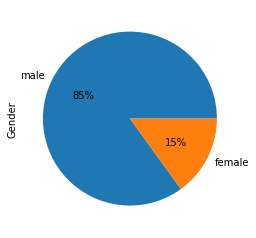

In [12]:
df['Gender'].value_counts().plot.pie(autopct='%1.0f%%')

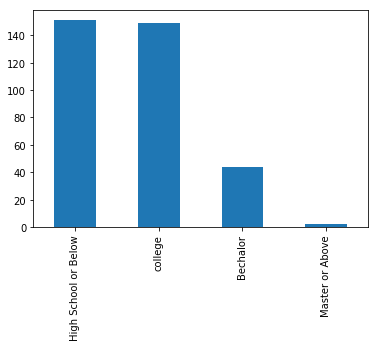

In [13]:
df['education'].value_counts().plot.bar()

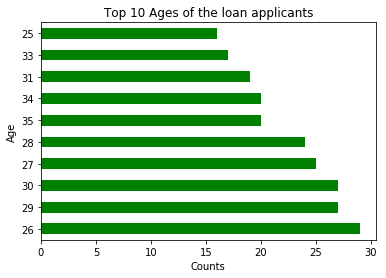

In [14]:
df['age'].value_counts()[:10].plot(kind='barh',color='green')
plt.title('Top 10 Ages of the loan applicants')
plt.xlabel('Counts')
plt.ylabel('Age')
plt.show()

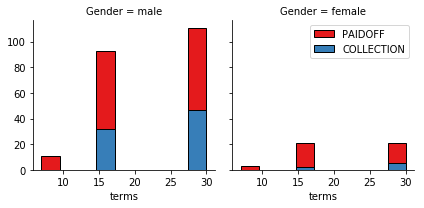

In [15]:
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
plot = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
plot.map(plt.hist, 'terms', bins=bins, ec="k")

plot.axes[-1].legend()
plt.show()

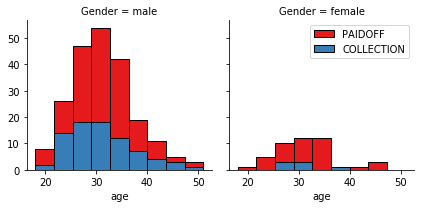

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
plot = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
plot.map(plt.hist, 'age', bins=bins, ec="k")

plot.axes[-1].legend()
plt.show()

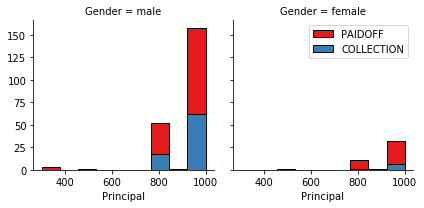

In [17]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
plot1 = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
plot1.map(plt.hist, 'Principal', bins=bins, ec="k")

plot1.axes[-1].legend()
plt.show()

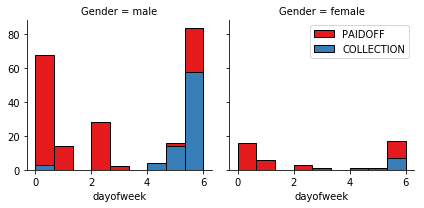

In [18]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Majority of the loan applicants are male. Very less applicants hold Masters and Above. Most of the applicants are in the age between 25 to 35. Males have high principal loan amount compare to females and most of the people who received the loan at the end of the week are not paid it off. 

# Data modelling <a name="e"></a>
The training set will be used to for model training and the test set is used to find the accuracy of the model. The following algorithms are used to build the classification models:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

## Pre-processing <a name="ee"></a>

In [19]:
#assign loan_status as target 
target = df['loan_status']

#creating new dataframe and dropping loan_status and dates column
Data = df.drop(['loan_status','effective_date','due_date','education'], axis=1)
#counting the values in target feature
target.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [20]:
target.replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [21]:
target.value_counts()

0    260
1     86
Name: loan_status, dtype: int64

In [22]:
Data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Data.head()

,Principal,terms,age,Gender,dayofweek,weekend
0,1000,30,45,0,3,0
1,1000,30,33,1,3,0
2,1000,15,27,0,3,0
3,1000,30,28,1,4,1
4,1000,30,29,0,4,1


In [23]:
Data.dtypes

Principal    int64
terms        int64
age          int64
Gender       int64
dayofweek    int64
weekend      int64
dtype: object

### Feature Scaling  <a name="c13"></a>

In [24]:
scalar = StandardScaler()
df_scalar = scalar.fit(Data).transform(Data)
df_scalar = pd.DataFrame(df_scalar, columns = Data.columns)
df_scalar.head(10)

,Principal,terms,age,Gender,dayofweek,weekend
0,0.515785,0.920718,2.331526,-0.420560,-0.261221,-1.205778
1,0.515785,0.920718,0.341701,2.377782,-0.261221,-1.205778
2,0.515785,-0.959111,-0.653211,-0.420560,-0.261221,-1.205778
3,0.515785,0.920718,-0.487392,2.377782,0.121755,0.829340
4,0.515785,0.920718,-0.321573,-0.420560,0.121755,0.829340
5,0.515785,0.920718,0.839157,-0.420560,0.121755,0.829340
6,0.515785,0.920718,-0.487392,-0.420560,0.121755,0.829340
7,-1.314589,-0.959111,-0.819029,-0.420560,0.504731,0.829340
8,-5.890524,-1.961686,-0.321573,-0.420560,0.504731,0.829340
9,0.515785,-0.959111,1.336614,-0.420560,0.504731,0.829340


## Classification Algorithm <a name="e4"></a>
The dataset is splitted into training and testing sets with the ratio of 80:20. The training set has 276 rows and the testing set has 70 rows. 

In [25]:
x=df_scalar
y=target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [26]:
#Checking the length of the train and test set
print('Length of x_train:',len(x_train),'\nLength of y_train:',len(y_train))
print('Length of x_test:',len(x_test),'\nLength of y_test:',len(y_test))

Length of x_train: 276 
Length of y_train: 276
Length of x_test: 70 
Length of y_test: 70


## K Nearest Neighbor(KNN) <a name="e41"></a>

In [27]:
#KNN Model Training
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_knn_predtrain=knn.predict(x_train)
y_knn_pred = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Train set Accuracy:",metrics.accuracy_score(y_train, y_knn_predtrain))
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_knn_pred))

Train set Accuracy: 0.782608695652174
Test set Accuracy: 0.8142857142857143


In [28]:
print(confusion_matrix(y_test, y_knn_pred))
print (classification_report(y_test, y_knn_pred))

[[52  6]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.45      0.42      0.43        12

   micro avg       0.81      0.81      0.81        70
   macro avg       0.67      0.66      0.66        70
weighted avg       0.81      0.81      0.81        70



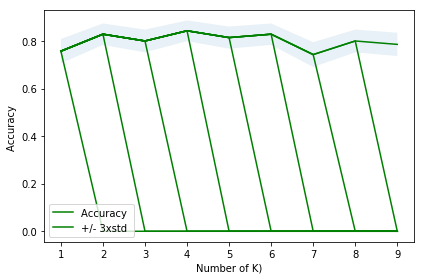

In [29]:
# Tuning the KNN Model

KNN = 10
mean_acc = np.zeros((KNN-1))
std_acc = np.zeros((KNN-1))
Confusion_matrix = [];
for n in range(1,KNN):
    
    #Train Model and Predict  
    n_neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_knn_pred_tuning=n_neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_knn_pred_tuning)

    
    std_acc[n-1]=np.std(y_knn_pred_tuning==y_test)/np.sqrt(y_knn_pred_tuning.shape[0])
    
    plt.plot(range(1,KNN),mean_acc,'g')
plt.fill_between(range(1,KNN),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8428571428571429 with k= 4


## Decision Tree  <a name="e42"></a>

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Training Decision Tree 
# Create Decision Tree classifer object
DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT = DT.fit(x_train,y_train)

#Predict the response for test dataset
y_DT_predtrain=DT.predict(x_train)
y_DT_pred = DT.predict(x_test)

print("Test set Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Test set Accuracy: 0.8428571428571429


In [32]:
print(confusion_matrix(y_test, y_DT_pred))
print (classification_report(y_test, y_DT_pred))

[[53  5]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

   micro avg       0.84      0.84      0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70



In [33]:
# tuning the Decision Tree
cv_method = StratifiedKFold(n_splits=5, random_state=999)
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [5,10,15,20],
             'min_samples_split': [2,5]}

DT2 = GridSearchCV(df_classifier, 
                     params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

DT2.fit(x_train, y_train)
y_DT_pred_tuning=DT2.predict(x_test)

print("Best parameter",DT2.best_params_)
print("Best score",DT2.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameter {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}
Best score 0.7137681159420289


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


In [34]:
DT_acc_tune=metrics.accuracy_score(y_test, y_DT_pred_tuning)
print("Best Accuracy of Decision Tree:",DT_acc_tune)
print (classification_report(y_test, y_DT_pred_tuning))

Best Accuracy of Decision Tree: 0.8285714285714286
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

   micro avg       0.83      0.83      0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70



## Support Vector Machine <a name="e43"></a>

In [35]:
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)
#predicting the test result
y_sv_pred = svc.predict(x_test)

# printing the accurancy of the model
svm_acc=metrics.accuracy_score(y_test, y_sv_pred)
print("Accuracy of SVM:",svm_acc)

Accuracy of SVM: 0.8285714285714286


In [36]:
print(confusion_matrix(y_test, y_sv_pred))
print (classification_report(y_test, y_sv_pred))

[[58  0]
 [12  0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        58
           1       0.00      0.00      0.00        12

   micro avg       0.83      0.83      0.83        70
   macro avg       0.41      0.50      0.45        70
weighted avg       0.69      0.83      0.75        70



In [37]:
#Tuning the SVM
svc=SVC()
grid_parameter = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svc_tuning = GridSearchCV(svc,grid_parameter,refit=True,verbose=2)
svc_tuning.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [38]:
y_svc_pred_tuning = svc_tuning.predict(x_test)
print ("Best score:",svc_tuning.best_score_)
print ("Best parameter:",svc_tuning.best_params_)

Best score: 0.7355072463768116
Best parameter: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}


In [39]:
svm_acc_tune=metrics.accuracy_score(y_test, y_svc_pred_tuning)
print("Best Accuracy of SVM:",svm_acc_tune)
print (classification_report(y_test, y_svc_pred_tuning))

Best Accuracy of SVM: 0.7571428571428571
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        58
           1       0.35      0.50      0.41        12

   micro avg       0.76      0.76      0.76        70
   macro avg       0.62      0.66      0.63        70
weighted avg       0.80      0.76      0.77        70



## Logistic Regression <a name="e44"></a>

In [40]:
# Training logistic regression
log=LogisticRegression()
log.fit(x_train,y_train)

#predicting the test set result
y_log_pred=log.predict(x_test)

# printing the accurancy of the model
log_acc=metrics.accuracy_score(y_test, y_log_pred)
print("Accuracy of Logistic Regression:",log_acc)

Accuracy of Logistic Regression: 0.8142857142857143


In [41]:
print(confusion_matrix(y_test, y_log_pred))
print (classification_report(y_test, y_log_pred))

[[57  1]
 [12  0]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        58
           1       0.00      0.00      0.00        12

   micro avg       0.81      0.81      0.81        70
   macro avg       0.41      0.49      0.45        70
weighted avg       0.68      0.81      0.74        70



In [42]:
#Tuning logistic regression
cv_fold = StratifiedKFold(n_splits=10, random_state=999)
cv_value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_choices = ['l1', 'l2']
parameter_grid = dict(C = cv_value, penalty = penalty_choices)
log_tuning = GridSearchCV(log, param_grid = parameter_grid, cv = cv_fold, scoring = 'accuracy', n_jobs = -1, verbose=1)
log_tuning.fit(x_train, y_train)
y_log_pred_tuning = log_tuning.predict(x_test)
print ("Best score: ",log_tuning.best_score_)
print ("Best parameter: ",log_tuning.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best score:  0.7355072463768116
Best parameter:  {'C': 1000, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


In [43]:
log_acc_tune=metrics.accuracy_score(y_test, y_log_pred_tuning)
print("Best Accuracy of Logistic Regression:",log_acc_tune)
print (classification_report(y_test, y_log_pred_tuning))

Best Accuracy of Logistic Regression: 0.8
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.00      0.00      0.00        12

   micro avg       0.80      0.80      0.80        70
   macro avg       0.41      0.48      0.44        70
weighted avg       0.68      0.80      0.74        70



# Model Evaluation using Test set <a name="f"></a>

In [44]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-09-28 12:23:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-09-28 12:23:22 (318 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [45]:
#importing/reading the test data 
df_test = pd.read_csv('loan_test.csv', sep = ',')

# View the dataset
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [46]:
# drop unnamed columns
df_test=df_test.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
#converting object into datetime
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])

df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [47]:
#assign loan_status as target 
target_test = df_test['loan_status']
target_test.replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

#creating new dataframe and dropping loan_status and dates columns
Data_test = df_test.drop(['loan_status','effective_date','due_date','education'], axis=1)

Data_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
scalar = StandardScaler()
df_scalar_test = scalar.fit(Data_test).transform(Data_test)
df_scalar_test = pd.DataFrame(df_scalar_test, columns = Data_test.columns)
df_scalar_test.head(10)

,Principal,terms,age,Gender,dayofweek,weekend
0,0.493626,0.928450,3.059819,1.977142,-0.286740,-1.303840
1,-3.562691,-1.704277,0.533363,-0.505781,0.100359,0.766965
2,0.493626,0.928450,1.880806,1.977142,0.487458,0.766965
3,0.493626,0.928450,-0.982511,-0.505781,0.487458,0.766965
4,-0.665322,-0.788546,-0.477219,-0.505781,0.874558,0.766965
5,-1.244796,-0.788546,0.196502,-0.505781,0.874558,0.766965
6,0.493626,-0.788546,-1.319371,-0.505781,0.874558,0.766965
7,0.493626,0.928450,0.028072,-0.505781,0.874558,0.766965
8,-0.665322,-0.788546,-0.814080,1.977142,0.874558,0.766965
9,0.493626,-0.788546,0.870224,-0.505781,0.874558,0.766965


In [48]:
x_testset=df_scalar_test
y_testset=target_test

## KNN Evaluation <a name="f1"></a>

In [49]:
# K Nearest Neighbor (KNN)
y_knn_test=n_neigh.predict(x_testset)

# jaccard
KNN_Jaccard = jaccard_similarity_score(y_testset, y_knn_test)
print("Jaccard accuracy of KNN = " , KNN_Jaccard)

# f1_score
KNN_f1_score = f1_score(y_testset, y_knn_test, average='weighted') 
print("F1 score accuracy of KNN = " , KNN_f1_score)

Jaccard accuracy of KNN =  0.6666666666666666
F1 score accuracy of KNN =  0.6666666666666666


## Decision Tree Evaluation <a name="f2"></a>

In [50]:
y_DT_test=DT2.predict(x_testset)

# jaccard
DT_Jaccard = jaccard_similarity_score(y_testset, y_DT_test)
print("Jaccard accuracy of Decision Tree = " , DT_Jaccard)

# f1_score
DT_f1_score = f1_score(y_testset, y_DT_test, average='weighted') 
print("F1 score accuracy of Decision Tree = " , DT_f1_score)

Jaccard accuracy of Decision Tree =  0.7407407407407407
F1 score accuracy of Decision Tree =  0.7407407407407407


## SVM Evaluation <a name="f3"></a>

In [51]:
y_sv_test=svc_tuning.predict(x_testset)

# jaccard
sv_Jaccard = jaccard_similarity_score(y_testset, y_sv_test)
print("Jaccard accuracy of SVM = " , sv_Jaccard)

# f1_score
sv_f1_score = f1_score(y_testset, y_sv_test, average='weighted') 
print("F1 score accuracy of SVM = " , sv_f1_score)

Jaccard accuracy of SVM =  0.6851851851851852
F1 score accuracy of SVM =  0.6719857206604195


## Logistic Regression Evaluation <a name="f4"></a>

In [52]:
y_log_test=log_tuning.predict(x_testset)
y_pred_log_proba=log_tuning.predict_proba(x_testset)


# jaccard
log_Jaccard = jaccard_similarity_score(y_testset, y_log_test)
print("Jaccard accuracy of Logistic Regression = " , log_Jaccard)

# f1_score
log_f1_score = f1_score(y_testset, y_log_test, average='weighted') 
print("F1 score accuracy of Logistic Regression = " , log_f1_score)
log_loss1 = log_loss(y_testset, y_pred_log_proba)
print("Logistic Regression - log loss " , log_loss1)


Jaccard accuracy of Logistic Regression =  0.7592592592592593
F1 score accuracy of Logistic Regression =  0.7144140000438048
Logistic Regression - log loss  0.46476476762177976


In [53]:
print("Evaluation Report")
performance_eva = {'Jaccard':[KNN_Jaccard,DT_Jaccard,sv_Jaccard,log_Jaccard],'F1-score':[KNN_f1_score,DT_f1_score,sv_f1_score,log_f1_score],'LogLoss':['NA','NA','NA',log_loss1]} 
  
# Creates pandas DataFrame. 
test_performance = pd.DataFrame(performance_eva, index =['KNN','Decision Tree','SVM','Logistic Regression']) 
  
# print the data 
test_performance

Evaluation Report


,Jaccard,F1-score,LogLoss
KNN,0.666667,0.666667,NA
Decision Tree,0.740741,0.740741,NA
SVM,0.685185,0.671986,NA
Logistic Regression,0.759259,0.714414,0.464765
